# Exploring ODF Extraction
## Sam Potter
## Current: 3/14/19

## Path and Imports

In [1]:
import sys
import os

sys.path.extend(['C:\\Users\\potterst1\\Desktop\Repositories\BitBucket\dic',
                 'C:/Users/potterst1/Desktop/Repositories/BitBucket/dic'])
sys.path.extend(['/workspace/stpotter/git/bitbucket/dic'])
from dic import visualize
from dic import fileIO
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import patches
from matplotlib import rc
from dic import utilities

from ipywidgets import *

## Magics

In [2]:
%matplotlib inline

## Optical Mathematics

### Cylindrical scattering for single fiber

$I_{fiber}(\theta) = a_0 + a_2 \cos(2(\theta - \phi)) + a_4 \cos(4(\theta - \phi))$

### Cylindrical scattering for a distribution of fibers

$I_{dist}(\theta) = \int_{-\pi/2}^{\pi/2} I_{fiber}(\theta) PDF_{dist}(\theta) d \theta$

## Setup Single Fiber Cosine Series

### Definition of single fiber function

In [3]:
def Ifiber(a0, a2, a4, phi, numpts=100):
    
    theta = np.linspace(-90, 90, numpts)
    
    vals = a0 + a2 * np.cos(np.deg2rad(2 * (theta - phi))) + a4 * np.cos(np.deg2rad(4 * (theta - phi)))
    
    nvals = utilities.normalize_1d(vals)
    
    return nvals, theta

In [4]:
def Ifiber_interactive(a0, a2, a4, phi, numpts=100):
    
    theta = np.linspace(-90, 90, numpts)
    
    vals = a0 + a2 * np.cos(np.deg2rad(2 * (theta - phi))) + a4 * np.cos(np.deg2rad(4 * (theta - phi)))
    
    nvals = utilities.normalize_1d(vals)
    
    fig = plt.figure(figsize=(10, 10))
    plt.plot(theta, nvals, color='g', label='Intensity');
    plt.legend(prop={'size': 18});
    plt.xlabel(r'$\theta$', fontsize=18);
    plt.ylabel('Normalized Intensity (a.u.)', fontsize=18);
    plt.title('Normalized Intensity Curves of Single Fiber under Cylindrical Scattering', fontsize=18);
    plt.autoscale(enable=True, axis='x', tight=True)
    
    print('a2/a4: {}'.format(a2/a4))

### Ranges of a0, a2, a4

In [5]:
a0 = np.linspace(0, 1, 10)
a2 = np.linspace(0, 0.05, 10)
a4 = np.linspace(0, 0.2, 10)

### Plot a sample intensity function

In [6]:
p = interactive(Ifiber_interactive, a0=(0, 1, 0.1), a2=(0, 0.05, 0.005), a4=(0, 0.2, 0.02), phi=(-90, 90, 5), numpts=(100, 500, 10))
display(p)

interactive(children=(FloatSlider(value=0.0, description='a0', max=1.0), FloatSlider(value=0.025, description=…

## Setup Gaussian Distribution

### Setup and generate samples

In [105]:
def compareI(a0, a2, a4, phi0, mu, sigma, nsamples):
    
    samples = np.random.normal(mu, sigma, nsamples)
    ntheta = 100
    Idist = np.zeros((len(samples), ntheta))
    for i in range(0, len(samples)):
        vals, theta_dist = Ifiber(a0, a2, a4, samples[i], numpts=ntheta)
        Idist[i, :] = vals

    Idist = np.sum(Idist, axis=0)
    Idist = utilities.normalize_1d(Idist)
    
    Ifibers, theta_fiber = Ifiber(a0, a2, a4, phi0, numpts=ntheta)
    
    fig = plt.figure(figsize=(8, 8))
    plt.plot(theta_fiber, Ifibers, color='g', label='Single Fiber Intensity');
    plt.plot(theta_dist, Idist, color='r', label='Fiber Distribution Intensity');
    plt.legend(prop={'size': 18}, loc='best');
    plt.xlabel(r'$\theta$', fontsize=18);
    plt.ylabel('Intensity (a.u.)', fontsize=18);
    plt.title('Intensity Curves from Single Fiber and a Distribution of Fibers', fontsize=18);
    plt.ylim(0, 1.25)
    plt.autoscale(enable=True, axis='x', tight=True)
    

In [107]:
p = interactive(compareI, a0=(0, 1, 0.1), a2=(0, 0.05, 0.005), a4=(0, 0.2, 0.02), phi0=(-90, 90, 5), mu=(-1, 1, 0.5), sigma=(0, 60, 5), nsamples=(10, 1000, 10))
display(p)

interactive(children=(FloatSlider(value=0.0, description='a0', max=1.0), FloatSlider(value=0.025, description=…

### Plot histogram and analytical distribution

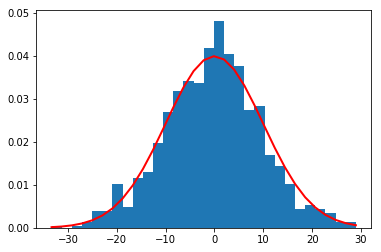

In [12]:
count, bins, ignored = plt.hist(samples, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

### Analytical distribution

In [13]:
def gauss(mu, sigma, x):
    
    val = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))
    
    return val